In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from time import time
from lr.text_processing.util import pre_process_nli_df
from lr.text_processing.transformations.wordnetsyn import wordnet_modifier, nlp, parallelize
from lr.text_processing.transformations.wordnetsyn import p_h_transformation_noun_minimal_edition

### Loading data

In [2]:
train_path = "data/toy/train.csv"
dev_path = "data/toy/dev.csv"
train = pd.read_csv(train_path)
dev = pd.read_csv(dev_path)
pre_process_nli_df(train)
pre_process_nli_df(dev)

In [3]:
sentence = train.premise[0]
t = wordnet_modifier(sentence, nlp)
print(sentence)
print(t)

a couple playing with a little boy on the beach
a duet playing with a little male child on the beach


In [4]:
%%timeit
t = wordnet_modifier(sentence, nlp)

5.98 ms ± 676 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [5]:
%%timeit
p_h_transformation_noun_minimal_edition(train)

7.24 s ± 507 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [6]:
%%timeit

parallelize(train,
            func=p_h_transformation_noun_minimal_edition,
            n_cores=2)

3.99 s ± 118 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


snli transfomation time cost 23.878 minutes



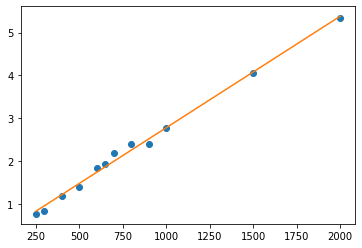

In [7]:
n_cores = 3
x = np.array([250, 300,400, 500, 600, 650, 700, 800, 900, 1000, 1500, 2000])
y = np.array([2.29, 2.5, 3.56, 4.18, 5.53, 5.77,6.53, 7.22, 7.16, 8.29,12.2, 16]) / n_cores

b1 = np.sum((x - np.mean(x))*(y-np.mean(y)))/ np.sum((x - np.mean(x))**2)
b0 = np.mean(y) - b1*np.mean(x)
g = lambda x: b0 + b1 *x

train_path = "data/snli/train.csv"
train_snli = pd.read_csv(train_path)
cost = g(train_snli.shape[0]) / 60
print("snli transfomation time cost {:.3f} minutes\n".format(cost))


plt.plot(x, y, "o");
plt.plot(x, g(x));